Enter Keyword/Tag to search about: amazon
Enter how many tweets to search: 70
How people are reacting on amazon by analyzing 70 tweets.


Polarity Percentages: 
22.86% people thought it was positive
5.71% people thought it was negative
31.43% people thought it was neutral


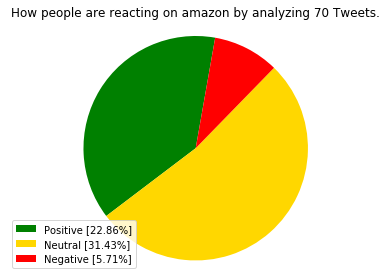

In [23]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt


class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        consumerKey = 'hxs9wQkidefoM1l7vtnAAEOyw'
        consumerSecret = 'dF6o2xly5MlMRFFEYwRnzJ75Hjz0YqtA7DcsENJyJJB0ZOpcGo'
        accessToken = '2176453907-KgmXS3aAD2ev26noH6AP5beXfqYiZMkoCdllL23'
        accessTokenSecret = 'WXpIYVtfeQtXe23OCoj0n3nFu41uq9HD07ELUuBPVLnUB'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        negative = 0
        neutral = 0

   

        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
        

        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
     

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        

        print()
        print("Polarity Percentages: ")
        print(str(positive) + "% people thought it was positive")
        print(str(negative) + "% people thought it was negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, negative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, negative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
        sizes = [positive, neutral, negative,]
        colors = ['green','gold','red']
        patches, texts = plt.pie(sizes, colors=colors, startangle=80)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

        # line of defense that prevents certain code from being run when modules are important 
if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()




In [3]:
!pip install tweepy

!pip install textblob
import pandas as pd

import collections

from nltk.corpus import stopwords
from textblob import TextBlob
import os
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
from textblob import TextBlob


import warnings
warnings.filterwarnings("ignore")


  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl


NameError: name 'csvFile' is not defined